Group 13


1.   M. Rifki Azhar
2.   Muhammad Kahfi

# Project Guidline
Hi teman-teman! Silakan menggunakan template notebook ini untuk mengerjakan projectmu.

**Informasi tambahan,**


1.   Copy notebook ini untuk mulai mengerjakan Projectmu.
2.   Kamu bebas untuk menambahkan cell pada notebook.


# Data Understanding
Menjelajahi struktur dan karakteristik dari sebuah data.

Menulis kode untuk mengkoneksikan notebook ke Google Drive



In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing_data.csv')

In [12]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [32]:
print(df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   mainroad         545 non-null    object
 1   guestroom        545 non-null    object
 2   basement         545 non-null    object
 3   hotwaterheating  545 non-null    object
 4   airconditioning  545 non-null    object
 5   prefarea         545 non-null    object
dtypes: object(6)
memory usage: 25.7+ KB
None


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Data Cleaning
Menangani nilai yang hilang, outlier, dan mempersiapkan variabel.

In [53]:
print(df.isnull().sum())
df.duplicated().sum()
df.shape

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


(545, 13)

In [49]:
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [16]:
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df_cleaned = remove_outliers_iqr(df, numerical_cols)

print(f"\nShape sebelum: {df.shape}, setelah: {df_cleaned.shape}")


Shape sebelum: (545, 13), setelah: (365, 13)


# Exploratory Data Analyst
Memvisualisasikan hubungan, distribusi data, dan lain sebagainya.

Text(0.5, 1.0, 'Distribusi Area Rumah')

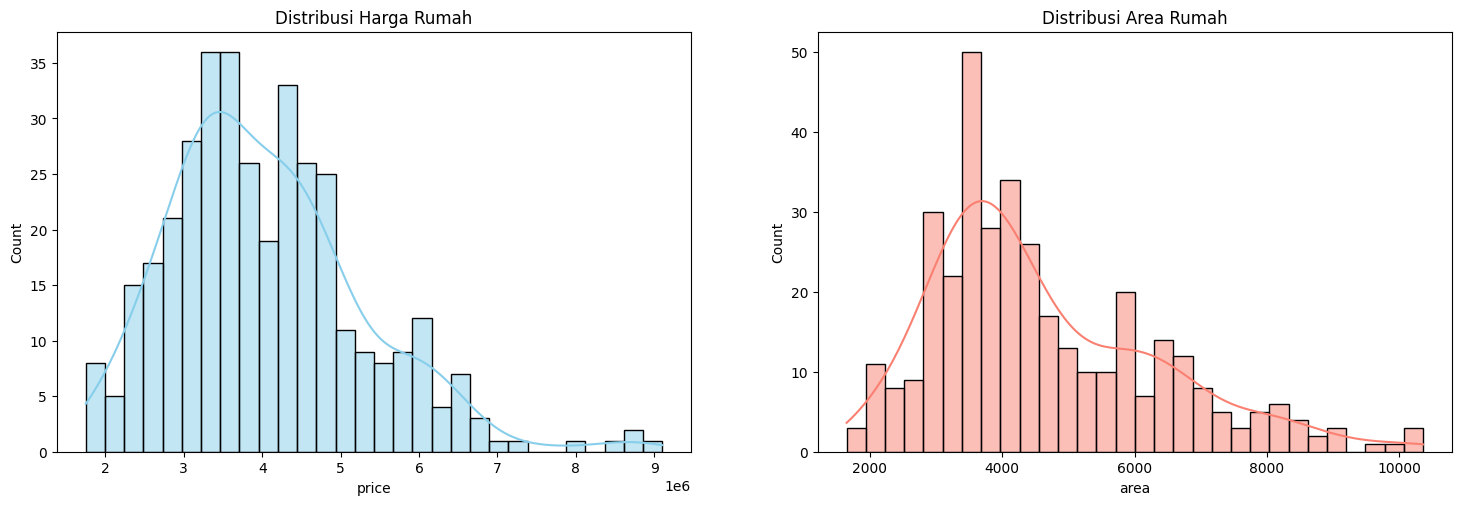

In [19]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.histplot(df_cleaned['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Harga Rumah')

plt.subplot(2, 2, 2)
sns.histplot(df_cleaned['area'], bins=30, kde=True, color='salmon')
plt.title('Distribusi Area Rumah')

In [29]:
num_col = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

cat_col = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
print(df_cleaned.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


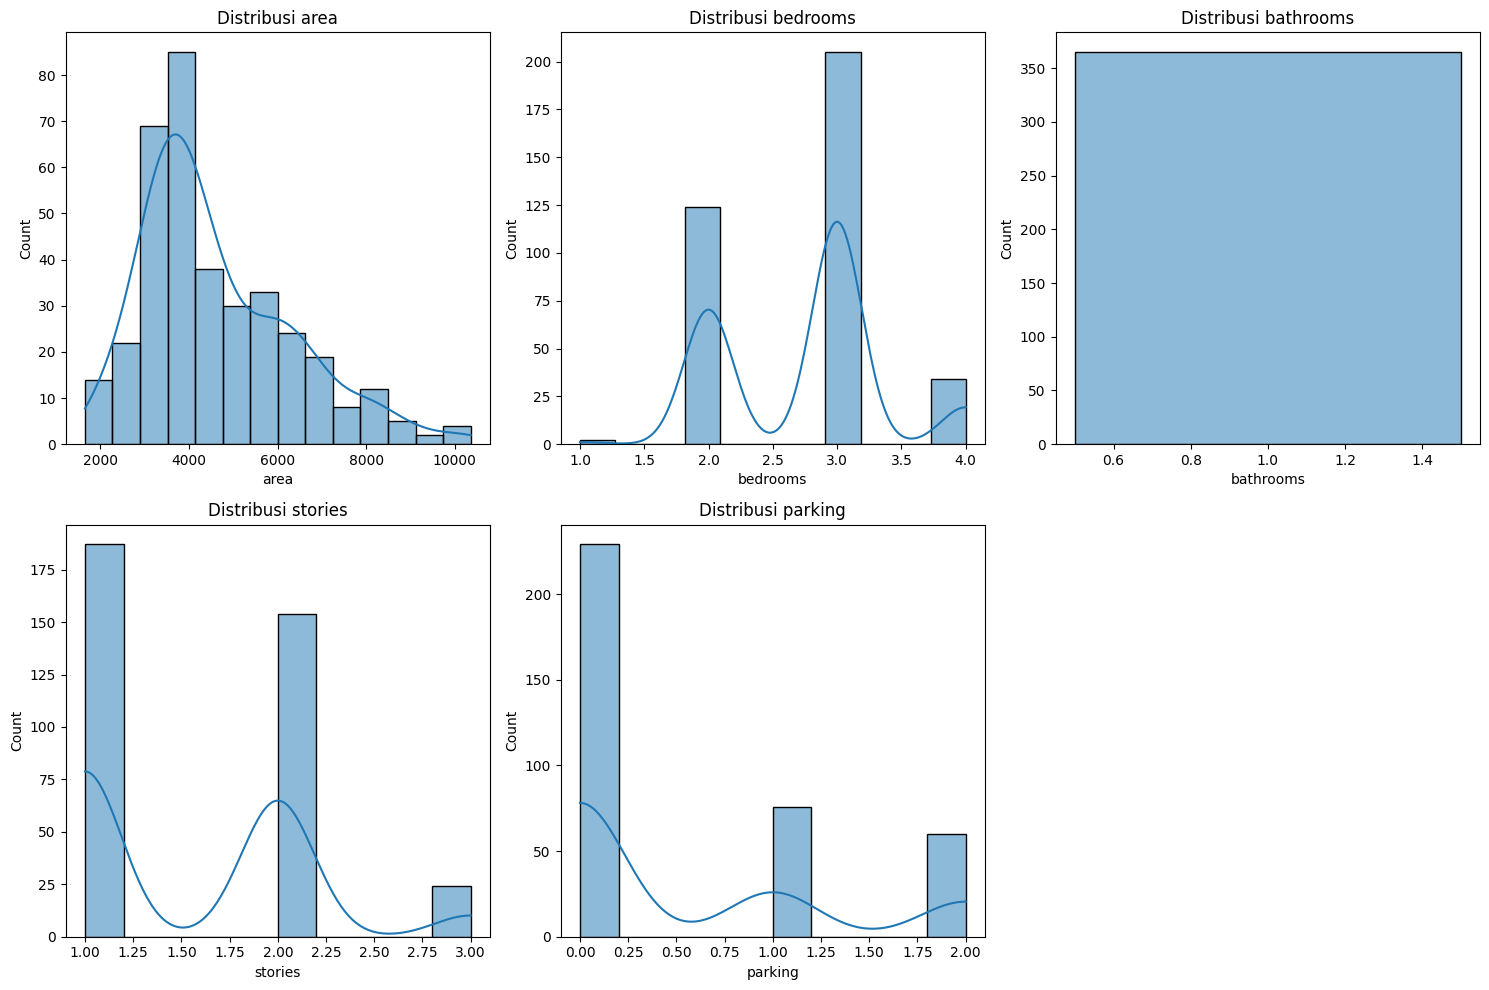

In [34]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_col):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Korelasi Variabel Numerik')

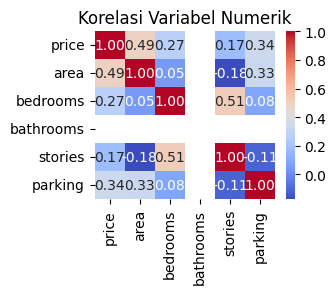

In [36]:
plt.subplot(2, 2, 3)
corr = df_cleaned[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Variabel Numerik')

<ipython-input-37-84709c45cda2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='furnishingstatus', y='price', palette='pastel')


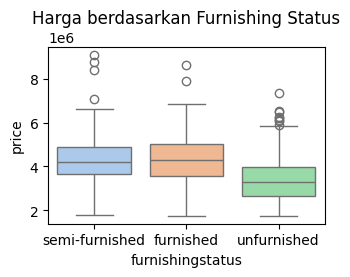

In [37]:
plt.subplot(2, 2, 4)
sns.boxplot(data=df_cleaned, x='furnishingstatus', y='price', palette='pastel')
plt.title('Harga berdasarkan Furnishing Status')

plt.tight_layout()
plt.show()

# Data Preparation
Memisahkan data training dan testing.

In [44]:
# Encoding variabel kategorikal
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nUkuran data latih: {X_train.shape}, data uji: {X_test.shape}")


Ukuran data latih: (292, 13), data uji: (73, 13)


# Model Building
Membuat regresi linier pada. Silakan mengeksplorasi dataset kamu terlebih dahulu dengan berbagai kombinasi prediktor.

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model dengan data training
model.fit(X_train, y_train)

# Prediksi terhadap data uji
y_pred = model.predict(X_test)

Model yang digunakan pada penelitian ini adalah Regresi Linear, yang bertujuan untuk memodelkan hubungan antara variabel-variabel input (fitur) dengan variabel target (misalnya harga rumah). Model dilatih menggunakan data latih hasil preprocessing, dan prediksi dilakukan terhadap data uji guna mengukur performa model terhadap data baru yang belum pernah dilihat sebelumnya.

# Evaluation
Melakukan evaluasi model yang telah dibuat menggunakan plot dan metrik evaluasi, serta tambahkan interpretasi hasilnya.


In [46]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Hasil Evaluasi Model:")
print(f"R-squared (R²): {r2:.3f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Hasil Evaluasi Model:
R-squared (R²): 0.497
Mean Squared Error (MSE): 1074203165776.44
Root Mean Squared Error (RMSE): 1036437.73


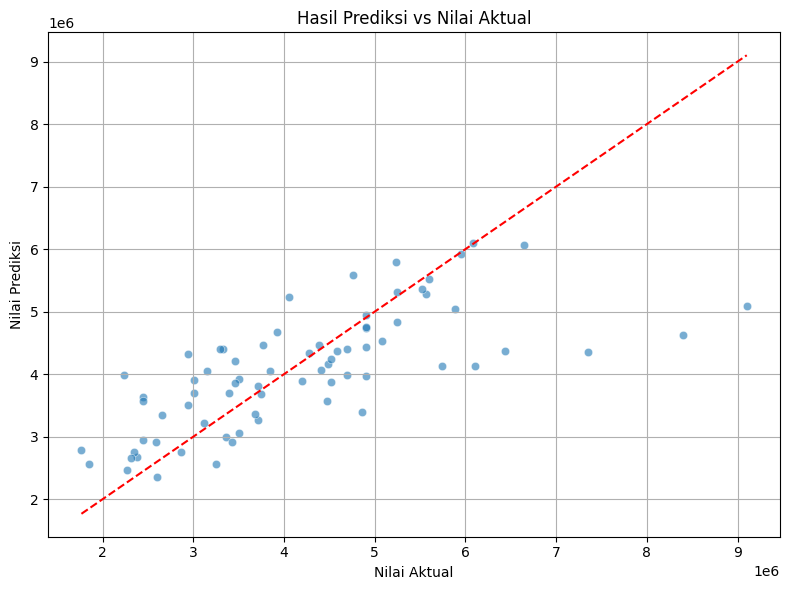

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis ideal y = x
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Hasil Prediksi vs Nilai Aktual")
plt.grid(True)
plt.tight_layout()
plt.show()

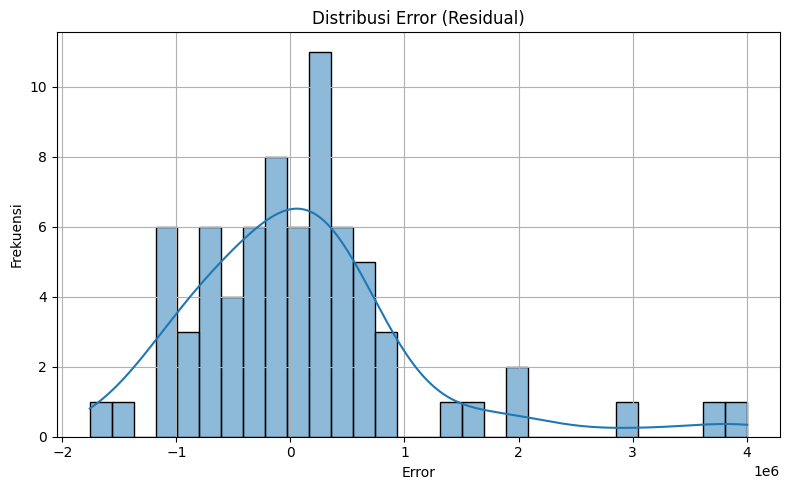

In [58]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribusi Error (Residual)")
plt.xlabel("Error")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.tight_layout()
plt.show()

# Interpretasi Koefisien Model

In [59]:
# Ambil nama kolom fitur
feature_names = X_train.columns

# Gabungkan koefisien ke DataFrame
coef_df = pd.DataFrame({
    'Fitur': feature_names,
    'Koefisien': model.coef_
}).sort_values(by='Koefisien', ascending=False)

# Tampilkan
print(coef_df)

                              Fitur     Koefisien
8               hotwaterheating_yes  6.834542e+05
10                     prefarea_yes  5.382321e+05
7                      basement_yes  4.859516e+05
9               airconditioning_yes  4.771705e+05
6                     guestroom_yes  3.355499e+05
3                           stories  3.040086e+05
5                      mainroad_yes  2.495346e+05
4                           parking  1.944158e+05
1                          bedrooms  1.114466e+05
0                              area  2.151913e+02
2                         bathrooms -1.746230e-10
11  furnishingstatus_semi-furnished -9.520396e+04
12     furnishingstatus_unfurnished -5.239412e+05
